In [1]:
from UTILITY_quickstart import *

In [2]:
#Start from golden lattice
tao = initializeTao(
    loadDefaultLatticeTF = False
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Base Tao lattice
WARNING! No beam file is specified!
Number of macro particles defined by input file


## Golden lattice

In [3]:
#The golden lattice linear optics gives 50 x 50 cm betas (zero alphas) at PENT
tao.ele_twiss("PENT")

{'mode_flip': False,
 'beta_a': 0.500113514905197,
 'alpha_a': -8.61413026751329e-05,
 'gamma_a': 1.99954605827816,
 'phi_a': 73.1003856252223,
 'eta_a': -4.29100544671707e-07,
 'etap_a': -7.60864677687215e-06,
 'beta_b': 0.499955681369933,
 'alpha_b': 0.000116201966385052,
 'gamma_b': 2.00017731724298,
 'phi_b': 60.4082301501082,
 'eta_b': -6.77061438266207e-18,
 'etap_b': -1.31862568529426e-17,
 'eta_x': -4.29100544671707e-07,
 'etap_x': -7.60864677687215e-06,
 'eta_y': -6.77059836943936e-18,
 'etap_y': -1.31862402801866e-17}

In [4]:
#At MFFF, have
#     Beta    Alpha
# x   11.55   -0.64
# y   25.2    -1.56
tao.ele_twiss("MFFF")

{'mode_flip': False,
 'beta_a': 11.5533562066008,
 'alpha_a': -0.64078864083071,
 'gamma_a': 0.122095264526835,
 'phi_a': 71.31011993097,
 'eta_a': 1.82993853116333e-05,
 'etap_a': 1.18535480249718e-06,
 'beta_b': 25.2039557159784,
 'alpha_b': -1.56858472563668,
 'gamma_b': 0.137298211459199,
 'phi_b': 56.2536406733655,
 'eta_b': -2.27197431822334e-17,
 'etap_b': -4.93465667198356e-20,
 'eta_x': 1.82993853116333e-05,
 'etap_x': 1.18535480249718e-06,
 'eta_y': -2.27197534407484e-17,
 'etap_y': -4.93522682312884e-20}

## Disable FF quads

In [5]:
setQuadkG(tao, "Q5FF", 0)
setQuadkG(tao, "Q4FF", 0)
setQuadkG(tao, "Q3FF", 0)
setQuadkG(tao, "Q2FF", 0)
setQuadkG(tao, "Q1FF", 0)
setQuadkG(tao, "Q0FF", 0)
setQuadkG(tao, "Q0D", 0)
setQuadkG(tao, "Q1D", 0)
setQuadkG(tao, "Q2D", 0)

In [6]:
tao.ele_twiss("PENT")

{'mode_flip': False,
 'beta_a': 62.1183955561056,
 'alpha_a': -2.56600115693764,
 'gamma_a': 0.122095264526835,
 'phi_a': 71.9394382055096,
 'eta_a': 3.69901994937505e-05,
 'etap_a': 1.18535480249718e-06,
 'beta_b': 108.80815352558,
 'alpha_b': -3.7335191001574,
 'gamma_b': 0.137298211459199,
 'phi_b': 56.5594895777048,
 'eta_b': -3.062786696503e-17,
 'etap_b': -4.93465667198356e-20,
 'eta_x': 3.69901994937505e-05,
 'etap_x': 1.18535480249718e-06,
 'eta_y': -3.06279671256493e-17,
 'etap_y': -4.93522682312884e-20}

## Changing beam into BC20

In [7]:
#Following code adapted from "2024-08-09 Second IP linear optics.ipynb"

In [8]:
pbounds = {
    #Made up limits
    # 'Q19701':  [-35, -15],   #BCON = -26.7
    # 'Q19801':  [25, 45],    #BCON = 35.7
    # 'Q18801':  [0, 100],   #BCON = -26.7
    # 'Q18901':  [-100, 0],    #BCON = 35.7

    #"Q6E": [-301, 0],
    #"Q5ER": [-33, -13],
    # "Q4ER_1": [120, 140], #Code below will keep all _1, _2, _3 in sync
    # "Q3ER_1": [100, 120], #Code below will keep all _1, _2 in sync
    # "Q2ER": [-165, -145],
    # "Q1ER": [150, 170],

    # Limits and values as of 2025-01-07 
    # SCP settings
    # "Q18601": [0, 106.5],       #BCON = 24.7
    # "Q18701": [-106.5, 0],      #BCON = -26.1
    # "Q18801": [0, 106.5],       #BCON = 27.9
    # "Q18901": [-106.5, 0],      #BCON = -26.85
    # 'Q19701':  [-107.5, 0],   #BCON = -26.7
    # 'Q19801':  [0, 107.5],    #BCON = 35.7


    #BC20 quads - bipolar boost range    
    # "Q4ER_1": [118, 146], # 132 +- 27/2
    #     #Code below will keep all _1, _2, _3 in sync
    # "Q3ER_1": [94, 126], # 110 +- 32/2
    #     #Code below will keep all _1, _2 in sync
    # "Q2ER": [-172, -136], # -154 +- -36/2
    # "Q1ER": [133, 189], #161 +- 56/2

    #BC20 quads - full boost range    
    "Q4ER_1": [105, 169], # 132 +- 27
        #Code below will keep all _1, _2, _3 in sync
    "Q3ER_1": [78, 142], # 110 +- 32
        #Code below will keep all _1, _2 in sync
    "Q2ER": [-190, -118], # -154 +- -36
    "Q1ER": [105, 217], #161 +- 56
    
    # EPICS for 851 and 871
    # 'Q19851':  [-101.9, 0],   #BCON = -64.1
    # 'Q19871':  [0, 101.9],    #BCON = 44.9


    #################################################################
    ### If using bounds above, use setQuadkG() in specificOptimizer()
    #################################################################
    ### If using bounds below, use setLattice() !!!
    #################################################################

    
    # "Q1EkG" :  (0, 388) , #BCON = 133
    # "Q2EkG" :  (-364, 0), #BCON = -136
    # "Q3EkG" :  (0, 299) , #BCON = 94
    # "Q4EkG" :  (0, 304) , #BCON = 118
    # "Q5EkG" :  (-117, 0), #BCON = -17
    # "Q6EkG" :  (-301, 0), #BCON = -142

}

In [9]:
quadNames = pbounds.keys()
[getQuadkG(tao, name) for name in quadNames]

[132.28941580900812, 110.23470630887479, -154.252921494901, 161.3297517863203]

In [10]:
def rampToZero(val, thresh, scale = 1):
    return (max(val, thresh) - thresh) / scale

def specificOptimizer(
    self,
    **kwargs
):

    self.totalNumEvals += 1
    self.displayEvals()

    savedData = kwargs
    
    badValue = -1e300  #The value returned for illegal config. Should be colossal. Double limit ~= 1e308
    bigCost  = 1e50   #Should be large enough to dominate any "normal" return value but be dominated by badValue
    
    try: #This try block deals with bad configurations. Instead of causing the optimizer to halt we now 'except' a low value
        #setLattice(tao, **kwargs)

        for name in quadNames:
            setQuadkG(tao, name, kwargs[name])

        if "Q3ER_1" in quadNames:
            setQuadkG(tao, "Q3ER_2", kwargs["Q3ER_1"])

        if "Q4ER_1" in quadNames:
            setQuadkG(tao, "Q4ER_2", kwargs["Q4ER_1"])
            setQuadkG(tao, "Q4ER_3", kwargs["Q4ER_1"])

    except:
        return badValue * 5



    
    try: 


        # savedData["betaX"]  = tao.ele_twiss("MFFF")["beta_a"]
        # savedData["alphaX"] = tao.ele_twiss("MFFF")["alpha_a"]
        # savedData["betaY"]  = tao.ele_twiss("MFFF")["beta_b"]
        # savedData["alphaY"] = tao.ele_twiss("MFFF")["alpha_b"]

        # savedData["betaX"]  = tao.ele_twiss("BEGBC20")["beta_a"]
        # savedData["alphaX"] = tao.ele_twiss("BEGBC20")["alpha_a"]
        # savedData["betaY"]  = tao.ele_twiss("BEGBC20")["beta_b"]
        # savedData["alphaY"] = tao.ele_twiss("BEGBC20")["alpha_b"]

        twissDict = tao.twiss_at_s(ele = "PENT", s_offset = 0.0)
        savedData["betaX"]  = twissDict["beta_a"]
        savedData["alphaX"] = twissDict["alpha_a"]
        savedData["betaY"]  = twissDict["beta_b"]
        savedData["alphaY"] = twissDict["alpha_b"]
        
        
            
    except:
        return badValue






    savedData["alphaPenalty"] = 1e3 * ( rampToZero(abs(savedData["alphaX"]), 0.01 ) ** 2 + rampToZero(abs(savedData["alphaY"]), 0.01 ) ** 2 )
    #savedData["magnetError"] = 0 * ( abs( kwargs["Q18801"] - 27.9 ) + abs( kwargs["Q18901"] - -26.85 ) ) 

    #Target specific betas
    #savedData["betaError"] = abs(savedData["betaX"] - 20) ** 2 + abs(savedData["betaY"] - 20) ** 2

    #Target symmetric (but arbitrary) beta
    savedData["betaError"] = 1e2 * abs(savedData["betaX"] - savedData["betaY"]) / (savedData["betaX"] + savedData["betaY"])

    #Using product instead of sum causes it to prefer more symmetric solutions
    #savedData["maximizeMe"] = savedData["betaX"] + savedData["betaY"] - savedData["alphaPenalty"]
    #savedData["maximizeMe"] = savedData["betaX"] * savedData["betaY"] - (savedData["alphaPenalty"] ** 2)
    #savedData["maximizeMe"] = np.min([savedData["betaX"], savedData["betaY"]]) - (savedData["alphaPenalty"] ** 2)
    #savedData["maximizeMe"] = 100 * np.min([savedData["betaX"], savedData["betaY"]]) + savedData["betaX"] + savedData["betaY"] - (savedData["alphaPenalty"] ** 2)
    savedData["maximizeMe"] =  np.min([savedData["betaX"], savedData["betaY"]]) - savedData["betaError"] - savedData["alphaPenalty"]# - savedData["magnetError"]
    

    
    #Collect desired data as a pandas Series
    tmpData = pd.Series( savedData ) 
    self.history = pd.concat([self.history, tmpData.to_frame().T])
    
    #Optional: Write to file
    #self.history.to_json('optimizerHistory.json', orient='records')
    n = self.totalNumEvals
    if (n < 100) or (n < 1000 and  n % 10 == 0) or (n % 100 == 0): #This gets expensive to write when n >> 10k
        self.history.to_json('optimizerHistory.json', orient='records')
    
    self.updatePlot()


    return savedData["maximizeMe"]




# Function to create optimizerWrapper based on pbounds
def create_optimizer_wrapper(pbounds):
    param_names = list(pbounds.keys())
    
    def optimizerWrapper(self, **kwargs):
        params = {name: kwargs.get(name, None) for name in param_names}
        if None in params.values():
            raise ValueError("All parameters must be provided")
        return specificOptimizer(self, **params)
    
    return optimizerWrapper

# Create the optimizerWrapper function
optimizerWrapper = create_optimizer_wrapper(pbounds)

In [11]:
class OptimizationProblem:
    def __init__(self):
        self.history = pd.DataFrame()
        self.totalNumEvals = 0
        self.plot_display_handle = None
        self.evals_display_handle = None


    def updatePlot(self):
        #This function seems to cause a substantial memory leak.
        #This hack below reduces the plotting frequency which makes it tolerable

        n = self.totalNumEvals
        
        if (n < 100) or (n < 1000 and  n % 10 == 0) or (n % 100 == 0): 
            plt.figure()
            plotKey = "maximizeMe"
            plt.plot(np.arange(len(self.history[plotKey])), self.history[plotKey], '-')
            
            plt.title('Optimization History')
            plt.xlabel('Evaluation #')
            plt.ylabel(plotKey)
            plt.yscale('log')
            plt.grid(True)
            
            
            if self.plot_display_handle is None:
                self.plot_display_handle = display(plt.gcf(), display_id=True)
            else:
                update_display(plt.gcf(), display_id=self.plot_display_handle.display_id)
            plt.close()

        return

    def displayEvals(self):
        if self.evals_display_handle is None:
            self.evals_display_handle = display(f"Total Num Evals: {self.totalNumEvals}", display_id=True)
        else:
            update_display(f"Total Num Evals: {self.totalNumEvals}", display_id=self.evals_display_handle.display_id)

# Attach the function to the class as a method
OptimizationProblem.optimizerWrapper = optimizerWrapper

# Instantiate the optimization problem
problem = OptimizationProblem()

In [12]:
from scipy.optimize import differential_evolution

# Convert pbounds to the format required by differential_evolution
bounds = [(low, high) for (low, high) in pbounds.values()]
param_names = list(pbounds.keys())

#scipy.optimize wants to optimize a function which is passed a vector of all the parameters
#This programmatically wraps the existing wrapper (ugh...) to handle this format
def create_DE_wrapper(obj, param_names):
    def wrapperDE(params):
        param_dict = dict(zip(param_names, params))

        #bayes_opt is a maximizer but differential_evolution is a minimizer... hence the inversion
        return -1*obj.optimizerWrapper(**param_dict)
    
    return wrapperDE

wrapperDE = create_DE_wrapper(problem, param_names)

In [13]:
defaultSettingsVector = [getQuadkG(tao, name) for name in quadNames]
#defaultSettingsVector = [ 139, 111, -156, 150 ] 


# importedDefaultSettings = loadConfig("setLattice_configs/defaults.yml")
# defaultSettingsVector = [importedDefaultSettings[name] for name in quadNames]

'Total Num Evals: 889'

/var/folders/3j/4b_6gm4j44z6mpdlh3f3ggjc0000gn/T/ipykernel_58001/1806273417.py:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


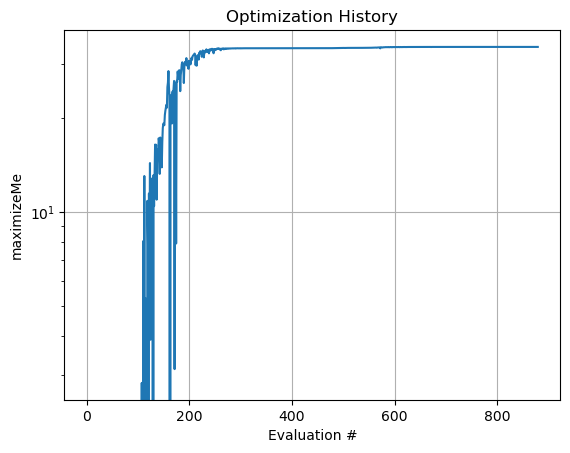

/var/folders/3j/4b_6gm4j44z6mpdlh3f3ggjc0000gn/T/ipykernel_58001/1806273417.py:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')
/var/folders/3j/4b_6gm4j44z6mpdlh3f3ggjc0000gn/T/ipykernel_58001/1806273417.py:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')
/var/folders/3j/4b_6gm4j44z6mpdlh3f3ggjc0000gn/T/ipykernel_58001/1806273417.py:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')
/var/folders/3j/4b_6gm4j44z6mpdlh3f3ggjc0000gn/T/ipykernel_58001/1806273417.py:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')
/var/folders/3j/4b_6gm4j44z6mpdlh3f3ggjc0000gn/T/ipykernel_58001/1806273417.py:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')
/var/folders/3j/4b_6gm4j44z6mpdlh3f3ggjc0000gn/T/ipykernel_58001/1806273417.py:23: UserWarning:

        Q4ER_1      Q3ER_1        Q2ER        Q1ER        betaX     alphaX  \
0   132.289416  110.234706 -154.252921  161.329752    62.118396  -2.566001   
0   138.903887  110.234706 -154.252921  161.329752   100.995843  -6.439859   
0   132.289416  115.746442 -154.252921  161.329752  1042.198623 -58.296523   
0   132.289416  110.234706 -161.965568  161.329752   159.281162  -6.634261   
0   132.289416  110.234706 -154.252921  169.396239    59.791888  -2.647784   
..         ...         ...         ...         ...          ...        ...   
0   149.698540  108.759771 -150.352630  105.000003    34.605720  -0.034895   
0   149.698442  108.759791 -150.352634  105.000003    34.605660  -0.034896   
0   149.698414  108.759796 -150.352634  105.000003    34.605671  -0.034897   
0   149.698461  108.759790 -150.352636  105.000003    34.605597  -0.034894   
0   149.698451  108.759792 -150.352637  105.000003    34.605577  -0.034894   

         betaY     alphaY  alphaPenalty     betaError    maximi

In [14]:
#### #Optional: Define list of starting points
totalPopSize = 100  # Total population size
numDimensions = len(bounds)  # Number of parameters

# #Uniformly distributed
populationDE = np.random.rand(totalPopSize, numDimensions)
for i in range(numDimensions):
    low, high = bounds[i]
    populationDE[:, i] = low + populationDE[:, i] * (high - low)

#Normally distributed
# populationDE = np.zeros((totalPopSize, numDimensions))
# for i in range(numDimensions):
#     low, high = bounds[i]

#     #Define mean based on bounds
#     #mean = (high + low) / 2

#     #Optional: Define mean based on defaultSettingsVector
#     mean = defaultSettingsVector[i]
    
#     std_dev = (high - low) / 1000
#     populationDE[:, i] = np.random.normal(mean, std_dev, totalPopSize)

#Optional: Add specific points to initial evaluation list
#populationDE = np.vstack([[ np.mean(i) for i in bounds ], populationDE])
populationDE = np.vstack([[ defaultSettingsVector ], populationDE])

# result = differential_evolution(
#     wrapperDE, 
#     bounds,
#     maxiter=1000, 
#     disp=True,
#     polish = False, 
#     init = populationDE
# )

from scipy.optimize import minimize


#Optional: Manually define starting simplex
# initial_simplex = np.tile(defaultSettingsVector, (numDimensions + 1, 1))
# for i in range(1, numDimensions + 1):
#     initial_simplex[i][i - 1] *= 1.1

result = minimize(
    wrapperDE, 
    defaultSettingsVector,
    method = "Nelder-Mead",
    bounds = bounds,
    #options={'initial_simplex': initial_simplex}
    options = {'adaptive': True, 'maxiter': 10000},
)

# result = minimize(
#     wrapperDE, 
#     defaultSettingsVector,
#     method = "L-BFGS-B",
#     bounds = bounds,
#     #options = {"eps": [0.001*x for x in defaultSettingsVector]}
#     #options = {"eps": [0.1 for x in defaultSettingsVector]}
# )

# result = minimize(
#     wrapperDE, 
#     defaultSettingsVector,
#     method = "COBYQA",
#     bounds = bounds,
#     options = {
#         "scale": True, 
#         #"initial_tr_radius": 1e-1, #1e-1
#         #"final_tr_radius": 1e-8, 
#         "disp": True 
#     } #"*_tr_radius" appears to constrain the scaled, not raw, variables (if scaling is enabled)
# )

print(problem.history) 

## Results

In [24]:
# Solution for MFFF
# Q18801 : 9.1118762703
# Q18901 : -26.8202925872
# Q19851 : -66.7286045338
# Q19871 : 38.2151615835
# betaX : 70.711628558
# alphaX : -0.0007707405
# betaY : 70.7116282515
# alphaY : 0.0092241649
# alphaPenalty : 0.
# magnetError : 1.8817831143
# betaError : 2.1677e-6
# maximizeMe : 998.1182147181

# defaultSettingsVector = [
#     9.1118762703,
#     -26.8202925872,
#     -66.7286045338,
#     38.2151615835,
# ]


#Solution for BEGBC20
# Q18601 : 11.0828855439
# Q18701 : -14.6111079829
# Q18801 : 29.1074584516
# Q18901 : -28.2598209214
# betaX : 29.9999745112
# alphaX : 0.006501117
# betaY : 30.000134506
# alphaY : -0.0010495807
# alphaPenalty : 0.
# magnetError : 0.
# betaError : 1.87e-8
# maximizeMe : 999.9999999813

# defaultSettingsVector = [
#     11.0828855439,
#     -14.6111079829,
#     29.1074584516,
#     -28.2598209214,
# ]


#MFFF solution with BC20 quads
# Q4ER_1 : 140.8988557651
# Q3ER_1 : 109.0853610373
# Q2ER : -153.2846988707
# Q1ER : 133.0038356884
# betaX : 16.6482155283
# alphaX : -0.0079475915
# betaY : 16.6482174646
# alphaY : -0.0009889492
# alphaPenalty : 0.
# betaError : 5.8152e-6
# maximizeMe : 16.6482097131

# bestSettings = {
# "Q4ER_1" : 140.8988557651,
# "Q3ER_1" : 109.0853610373,
# "Q2ER" : -153.2846988707,
# "Q1ER" : 133.0038356884,
# }

#PENT solution with BC20 quads (full BOOST range)
# Q4ER_1 : 149.698406205
# Q3ER_1 : 108.7598054393
# Q2ER : -150.3526427039
# Q1ER : 105.0000034129
# betaX : 34.6054312443
# alphaX : -0.0348912443
# betaY : 34.6054312505
# alphaY : 0.0169526787
# alphaPenalty : 0.6679137845
# betaError : 9.1e-9
# maximizeMe : 33.9375174507

bestSettings = {
    "Q4ER_1" : 149.698406205,
    "Q3ER_1" : 108.7598054393,
    "Q2ER" : -150.3526427039,
    "Q1ER" : 105.0000034129,
}

In [25]:
#Start from golden lattice
tao = initializeTao(
    loadDefaultLatticeTF = False
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Base Tao lattice
WARNING! No beam file is specified!
Number of macro particles defined by input file


In [26]:
tao.ele_twiss("PENT")

{'mode_flip': False,
 'beta_a': 0.500113514905197,
 'alpha_a': -8.61413026751329e-05,
 'gamma_a': 1.99954605827816,
 'phi_a': 73.1003856252223,
 'eta_a': -4.29100544671707e-07,
 'etap_a': -7.60864677687215e-06,
 'beta_b': 0.499955681369933,
 'alpha_b': 0.000116201966385052,
 'gamma_b': 2.00017731724298,
 'phi_b': 60.4082301501082,
 'eta_b': -6.77061438266207e-18,
 'etap_b': -1.31862568529426e-17,
 'eta_x': -4.29100544671707e-07,
 'etap_x': -7.60864677687215e-06,
 'eta_y': -6.77059836943936e-18,
 'etap_y': -1.31862402801866e-17}

In [27]:
# for i in range(len(quadNames)):
#     setQuadkG(tao, list(quadNames)[i], defaultSettingsVector[i])

for name in quadNames:
    setQuadkG(tao, name, bestSettings[name])

if "Q3ER_1" in quadNames:
    setQuadkG(tao, "Q3ER_2", bestSettings["Q3ER_1"])

if "Q4ER_1" in quadNames:
    setQuadkG(tao, "Q4ER_2", bestSettings["Q4ER_1"])
    setQuadkG(tao, "Q4ER_3", bestSettings["Q4ER_1"])


# #BC20 quads
# setQuadkG(tao, "Q1EL", 0)
# setQuadkG(tao, "Q2EL", 0)
# setQuadkG(tao, "Q3EL_1", 0)
# setQuadkG(tao, "Q3EL_2", 0)
# setQuadkG(tao, "Q4EL_1", 0)
# setQuadkG(tao, "Q4EL_2", 0)
# setQuadkG(tao, "Q4EL_3", 0)
# setQuadkG(tao, "Q5EL", 0)
# setQuadkG(tao, "Q6E", 0)
# setQuadkG(tao, "Q5ER", 0)
# setQuadkG(tao, "Q4ER_1", 0)
# setQuadkG(tao, "Q4ER_2", 0)
# setQuadkG(tao, "Q4ER_3", 0)
# setQuadkG(tao, "Q3ER_1", 0)
# setQuadkG(tao, "Q3ER_2", 0)
# setQuadkG(tao, "Q2ER", 0)
# setQuadkG(tao, "Q1ER", 0)

# #BC20 sextupoles
# setSextkG(tao, "S1EL",   0)
# setSextkG(tao, "S2EL",   0)
# setSextkG(tao, "S3EL_1", 0)
# setSextkG(tao, "S3EL_2", 0)
# setSextkG(tao, "S3ER_1", 0)
# setSextkG(tao, "S3ER_2", 0)
# setSextkG(tao, "S2ER",   0)
# setSextkG(tao, "S1ER",   0)

#IP quads
setQuadkG(tao, "Q5FF", 0)
setQuadkG(tao, "Q4FF", 0)
setQuadkG(tao, "Q3FF", 0)
setQuadkG(tao, "Q2FF", 0)
setQuadkG(tao, "Q1FF", 0)
setQuadkG(tao, "Q0FF", 0)
setQuadkG(tao, "Q0D", 0)
setQuadkG(tao, "Q1D", 0)
setQuadkG(tao, "Q2D", 0)

In [28]:
tao.ele_twiss("PENT")

{'mode_flip': False,
 'beta_a': 34.6054312434826,
 'alpha_a': -0.0348912442786957,
 'gamma_a': 0.0289323774607166,
 'phi_a': 71.3929134224581,
 'eta_a': 0.25722980889581,
 'etap_a': 0.00703810570674548,
 'beta_b': 34.6054312497198,
 'alpha_b': 0.0169526787588886,
 'gamma_b': 0.0289055028992075,
 'phi_b': 55.7841566930006,
 'eta_b': -5.23981051661064e-17,
 'etap_b': 3.09315269520948e-19,
 'eta_x': 0.25722980889581,
 'etap_x': 0.00703810570674548,
 'eta_y': -4.99881538335302e-17,
 'etap_y': 2.51440024990579e-19}

In [29]:
tao.ele_twiss("MFFF")

{'mode_flip': False,
 'beta_a': 40.6986521573231,
 'alpha_a': 0.421317892283347,
 'gamma_a': 0.0289323774607166,
 'phi_a': 70.9592885868486,
 'eta_a': 0.146252128894701,
 'etap_a': 0.00703810570674548,
 'beta_b': 42.3269324194407,
 'alpha_b': 0.472738054068742,
 'gamma_b': 0.0289055028992075,
 'phi_b': 55.3595065736466,
 'eta_b': -5.12876508087603e-17,
 'etap_b': 3.09315269520948e-19,
 'eta_x': 0.146252128894701,
 'etap_x': 0.00703810570674548,
 'eta_y': -4.79651158016705e-17,
 'etap_y': 2.51440024990579e-19}

In [30]:
getMatrix(tao,"MFFF","PENT",print = True);

1.000000,15.768118,0.000000,0.000000,0.000000,-0.000000
0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,1.000000,15.768118,0.000000,-0.000000
0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
0.000000,-0.000000,0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


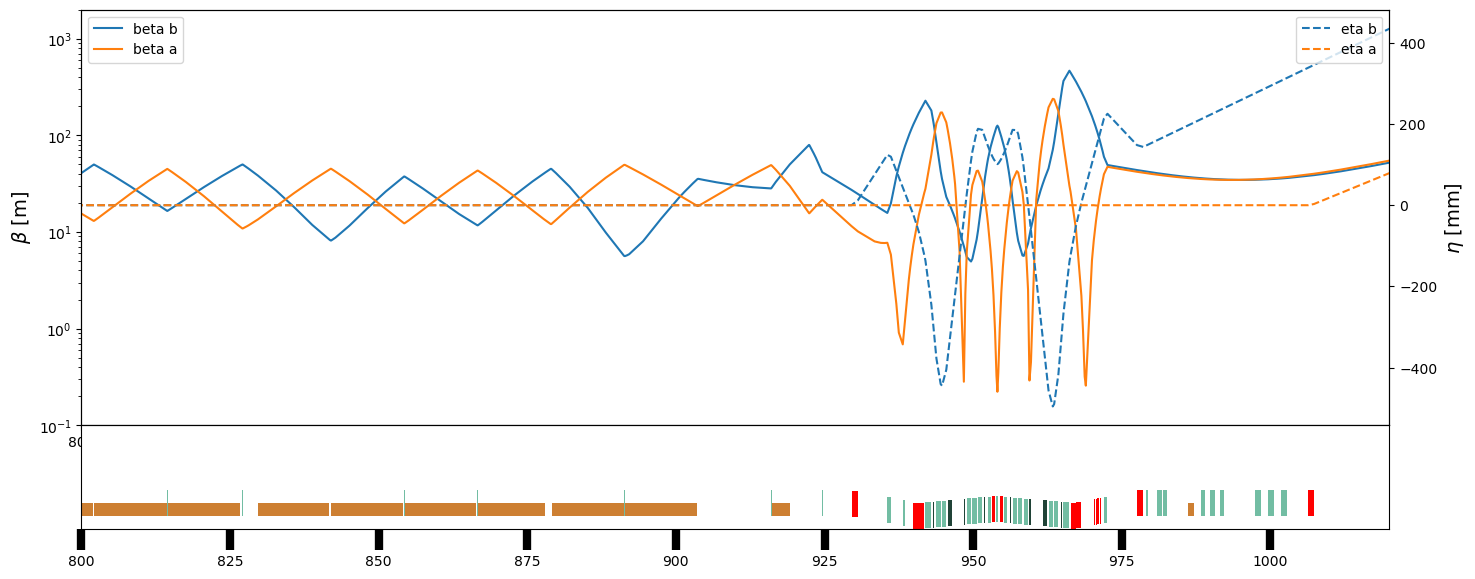

In [31]:
floorplanPlot(tao,
              zmin = 800,
              zmax = 1020,
              ymin = 0.1,
              ymax = 2e3
             )

In [23]:
tao.cmd('show ele MFFF')

['Element # 1468',
 'Element Name: MFFF',
 'Key: Marker',
 'S_start, S:    979.004697,    979.004697',
 'Ref_time_start, Ref_time:  3.265625E-06,  3.265625E-06',
 '',
 'Attribute values [Only non-zero values shown]:',
 '    1  L                           =  0.0000000E+00 m',
 '    7  OSC_AMPLITUDE               =  0.0000000E+00 m',
 '   24  TILT_CALIB                  =  0.0000000E+00 rad',
 '   25  DE_ETA_MEAS                 =  0.0000000E+00',
 '   53  P0C                         =  1.0000000E+10 eV           BETA                        =  1.0000000E+00',
 '   54  E_TOT                       =  1.0000000E+10 eV           GAMMA                       =  1.9569512E+04',
 '   64  REF_TIME_START              =  3.2656252E-06 sec      50  DELTA_REF_TIME              =  0.0000000E+00 sec',
 '',
 '       TRACKING_METHOD              =  Bmad_Standard             APERTURE_AT                =  Exit_End',
 '       MAT6_CALC_METHOD             =  Auto                      APERTURE_TYPE           